In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ploty
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import warnings as wr
wr.filterwarnings("ignore")
df = pd.read_csv('survey_results_public.csv')
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [3]:
df.shape

(65437, 114)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [5]:
df.describe().T

count           mean            std  min      25%  \
ResponseId           65437.0   3.271900e+04   1.889018e+04  1.0  16360.0   
CompTotal            33740.0  2.963841e+145  5.444117e+147  0.0  60000.0   
WorkExp              29658.0   1.146696e+01   9.168709e+00  0.0      4.0   
JobSatPoints_1       29324.0   1.858109e+01   2.596622e+01  0.0      0.0   
JobSatPoints_4       29393.0   7.522140e+00   1.842266e+01  0.0      0.0   
JobSatPoints_5       29411.0   1.006086e+01   2.183384e+01  0.0      0.0   
JobSatPoints_6       29450.0   2.434323e+01   2.708936e+01  0.0      0.0   
JobSatPoints_7       29448.0   2.296522e+01   2.701774e+01  0.0      0.0   
JobSatPoints_8       29456.0   2.027817e+01   2.610811e+01  0.0      0.0   
JobSatPoints_9       29456.0   1.616943e+01   2.484503e+01  0.0      0.0   
JobSatPoints_10      29450.0   1.095571e+01   2.290626e+01  0.0      0.0   
JobSatPoints_11      29445.0   9.953948e+00   2.177565e+01  0.0      0.0   
ConvertedCompYearly  23435.0   8.615529e+04   1.867570e+05  1.0  32712.0   
JobSat               29126.0   6.935041e+00   2.088259e+00  0.0      6.0   

                          50%       75%            max  
ResponseId            32719.0   49078.0   6.543700e+04  
CompTotal            110000.0  250000.0  1.000000e+150  
WorkExp                   9.0      16.0   5.000000e+01  
JobSatPoints_1           10.0      22.0   1.000000e+02  
JobSatPoints_4            0.0       5.0   1.000000e+02  
JobSatPoints_5            0.0      10.0   1.000000e+02  
JobSatPoints_6           20.0      30.0   1.000000e+02  
JobSatPoints_7           15.0      30.0   1.000000e+02  
JobSatPoints_8           10.0      25.0   1.000000e+02  
JobSatPoints_9            5.0      20.0   1.000000e+02  
JobSatPoints_10           0.0      10.0   1.000000e+02  
JobSatPoints_11           0.0      10.0   1.000000e+02  
ConvertedCompYearly   65000.0  107971.5   1.625660e+07  
JobSat                    7.0       8.0   1.000000e+01

In [6]:
df.columns.tolist()

['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

In [7]:
df.isnull().sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

In [8]:
df.nunique()

ResponseId             65437
MainBranch                 5
Age                        8
Employment               110
RemoteWork                 3
                       ...  
JobSatPoints_11           79
SurveyLength               3
SurveyEase                 3
ConvertedCompYearly     6113
JobSat                    11
Length: 114, dtype: int64

In [16]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].apply(zscore)

ResponseId  CompTotal  WorkExp  JobSatPoints_1  JobSatPoints_4  \
0       -1.732024        NaN      NaN             NaN             NaN   
1       -1.731971        NaN      NaN             NaN             NaN   
2       -1.731918        NaN      NaN             NaN             NaN   
3       -1.731866        NaN      NaN             NaN             NaN   
4       -1.731813        NaN      NaN             NaN             NaN   
...           ...        ...      ...             ...             ...   
65432    1.731813        NaN      NaN             NaN             NaN   
65433    1.731866        NaN      NaN             NaN             NaN   
65434    1.731918        NaN      NaN             NaN             NaN   
65435    1.731971        NaN      NaN             NaN             NaN   
65436    1.732024        NaN      NaN             NaN             NaN   

       JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  JobSatPoints_8  \
0                 NaN             NaN             NaN             NaN   
1                 NaN             NaN             NaN             NaN   
2                 NaN             NaN             NaN             NaN   
3                 NaN             NaN             NaN             NaN   
4                 NaN             NaN             NaN             NaN   
...               ...             ...             ...             ...   
65432             NaN             NaN             NaN             NaN   
65433             NaN             NaN             NaN             NaN   
65434             NaN             NaN             NaN             NaN   
65435             NaN             NaN             NaN             NaN   
65436             NaN             NaN             NaN             NaN   

       JobSatPoints_9  JobSatPoints_10  JobSatPoints_11  ConvertedCompYearly  \
0                 NaN              NaN              NaN                  NaN   
1                 NaN              NaN              NaN                  NaN   
2                 NaN              NaN              NaN                  NaN   
3                 NaN              NaN              NaN                  NaN   
4                 NaN              NaN              NaN                  NaN   
...               ...              ...              ...                  ...   
65432             NaN              NaN              NaN                  NaN   
65433             NaN              NaN              NaN                  NaN   
65434             NaN              NaN              NaN                  NaN   
65435             NaN              NaN              NaN                  NaN   
65436             NaN              NaN              NaN                  NaN   

       JobSat  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
...       ...  
65432     NaN  
65433     NaN  
65434     NaN  
65435     NaN  
65436     NaN  

[65437 rows x 14 columns]

In [23]:
iqr = df.quantile(q=0.75,numeric_only=True) - df.quantile(q=0.25,numeric_only=True)
min = df.quantile(q=0.25,numeric_only=True) - 1.5 * iqr
min


ResponseId             -32717.00
CompTotal             -225000.00
WorkExp                   -14.00
JobSatPoints_1            -33.00
JobSatPoints_4             -7.50
JobSatPoints_5            -15.00
JobSatPoints_6            -45.00
JobSatPoints_7            -45.00
JobSatPoints_8            -37.50
JobSatPoints_9            -30.00
JobSatPoints_10           -15.00
JobSatPoints_11           -15.00
ConvertedCompYearly    -80177.25
JobSat                      3.00
dtype: float64

In [24]:
max = df.quantile(q=0.75,numeric_only=True) + 1.5 * iqr
max

ResponseId              98155.00
CompTotal              535000.00
WorkExp                    34.00
JobSatPoints_1             55.00
JobSatPoints_4             12.50
JobSatPoints_5             25.00
JobSatPoints_6             75.00
JobSatPoints_7             75.00
JobSatPoints_8             62.50
JobSatPoints_9             50.00
JobSatPoints_10            25.00
JobSatPoints_11            25.00
ConvertedCompYearly    220860.75
JobSat                     11.00
dtype: float64

In [27]:
scale = StandardScaler()
transform = scale.fit_transform(df[numeric_cols].dropna())
transform

array([[-1.72941672, -0.03838026, -0.91976996, ...,  3.7378133 ,
        -0.45549028,  1.46483359],
       [-1.70308355, -0.04178286, -0.47014355, ..., -0.46447967,
         0.02889835,  1.46483359],
       [-1.70222579, -0.04173935, -0.35773695, ..., -0.23101895,
         0.136796  ,  1.46483359],
       ...,
       [ 1.79699795, -0.04163492,  2.11520829, ..., -0.46447967,
         0.48289913,  0.98961338],
       [ 1.7971695 , -0.04190992, -1.14458316, ..., -0.46447967,
        -0.42850578, -1.86170791],
       [ 1.79725528, -0.04158271,  3.23927431, ..., -0.23101895,
         0.78766601,  1.46483359]], shape=(15795, 14))

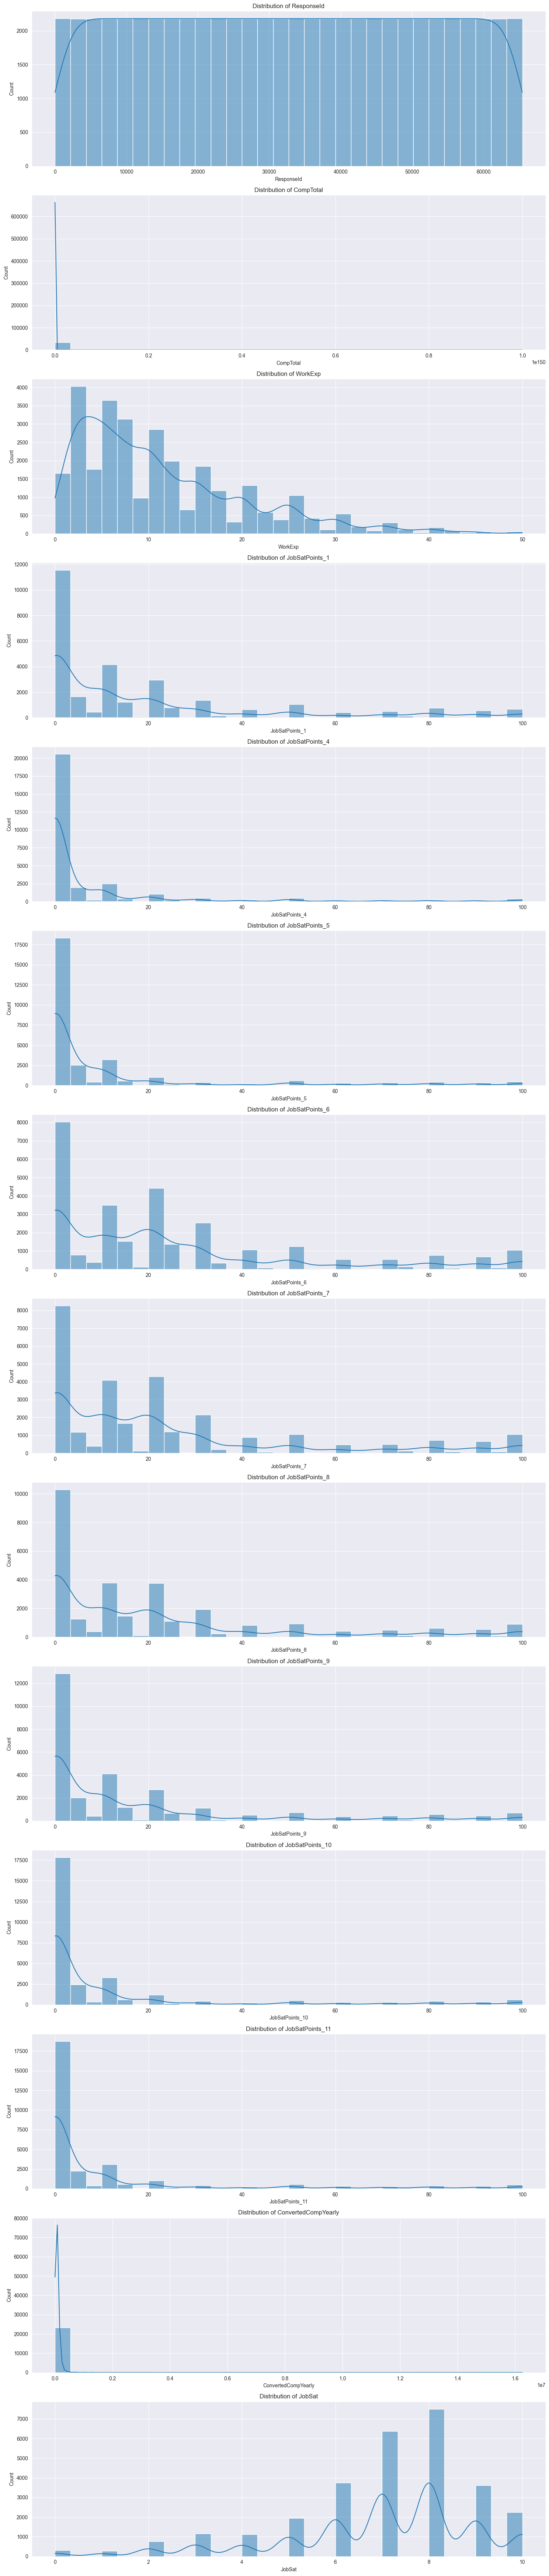

In [10]:
sns.set_style("darkgrid")

numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(15,len(numerical_cols)*5))
for idx, feature in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, idx + 1)
    sns.histplot(df[feature].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

<Figure size 1500x7000 with 0 Axes>

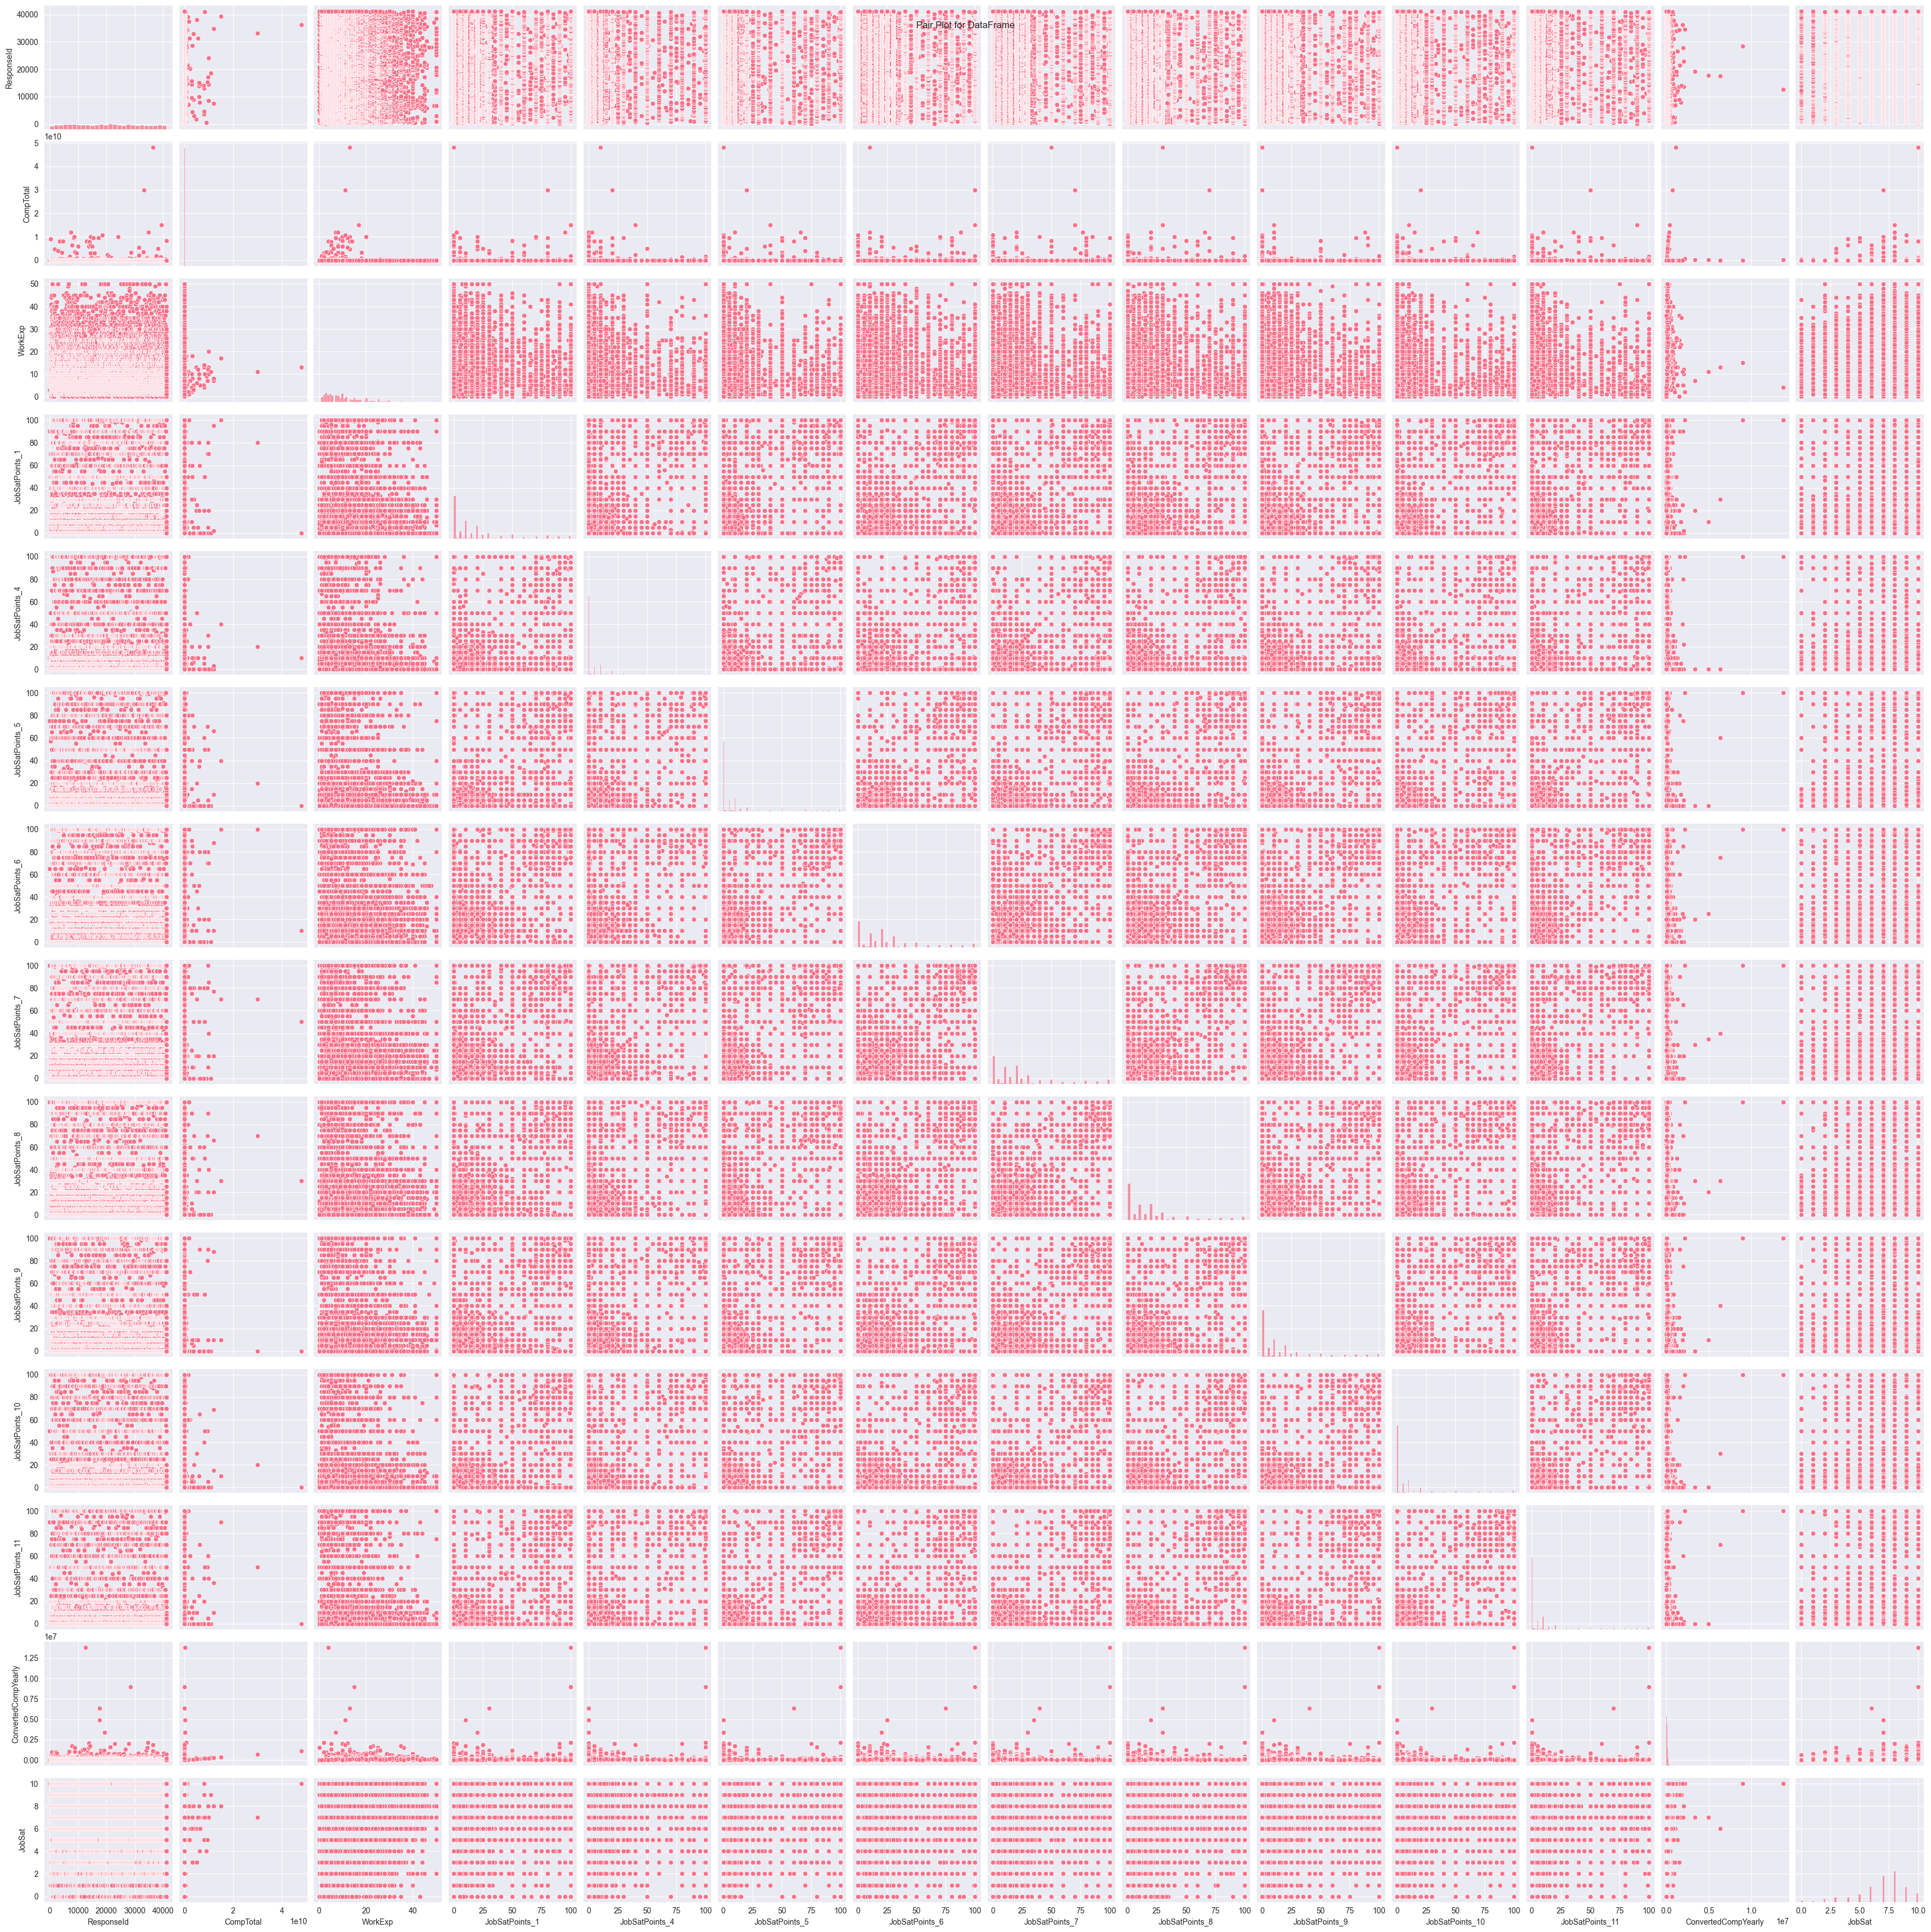

In [11]:
plt.figure(figsize=(15, len(numerical_cols)*5))
sns.set_palette("husl")
sns.pairplot(df[numerical_cols].dropna())
plt.suptitle('Pair Plot for DataFrame')
plt.show()

Heatmap without dropping NAN

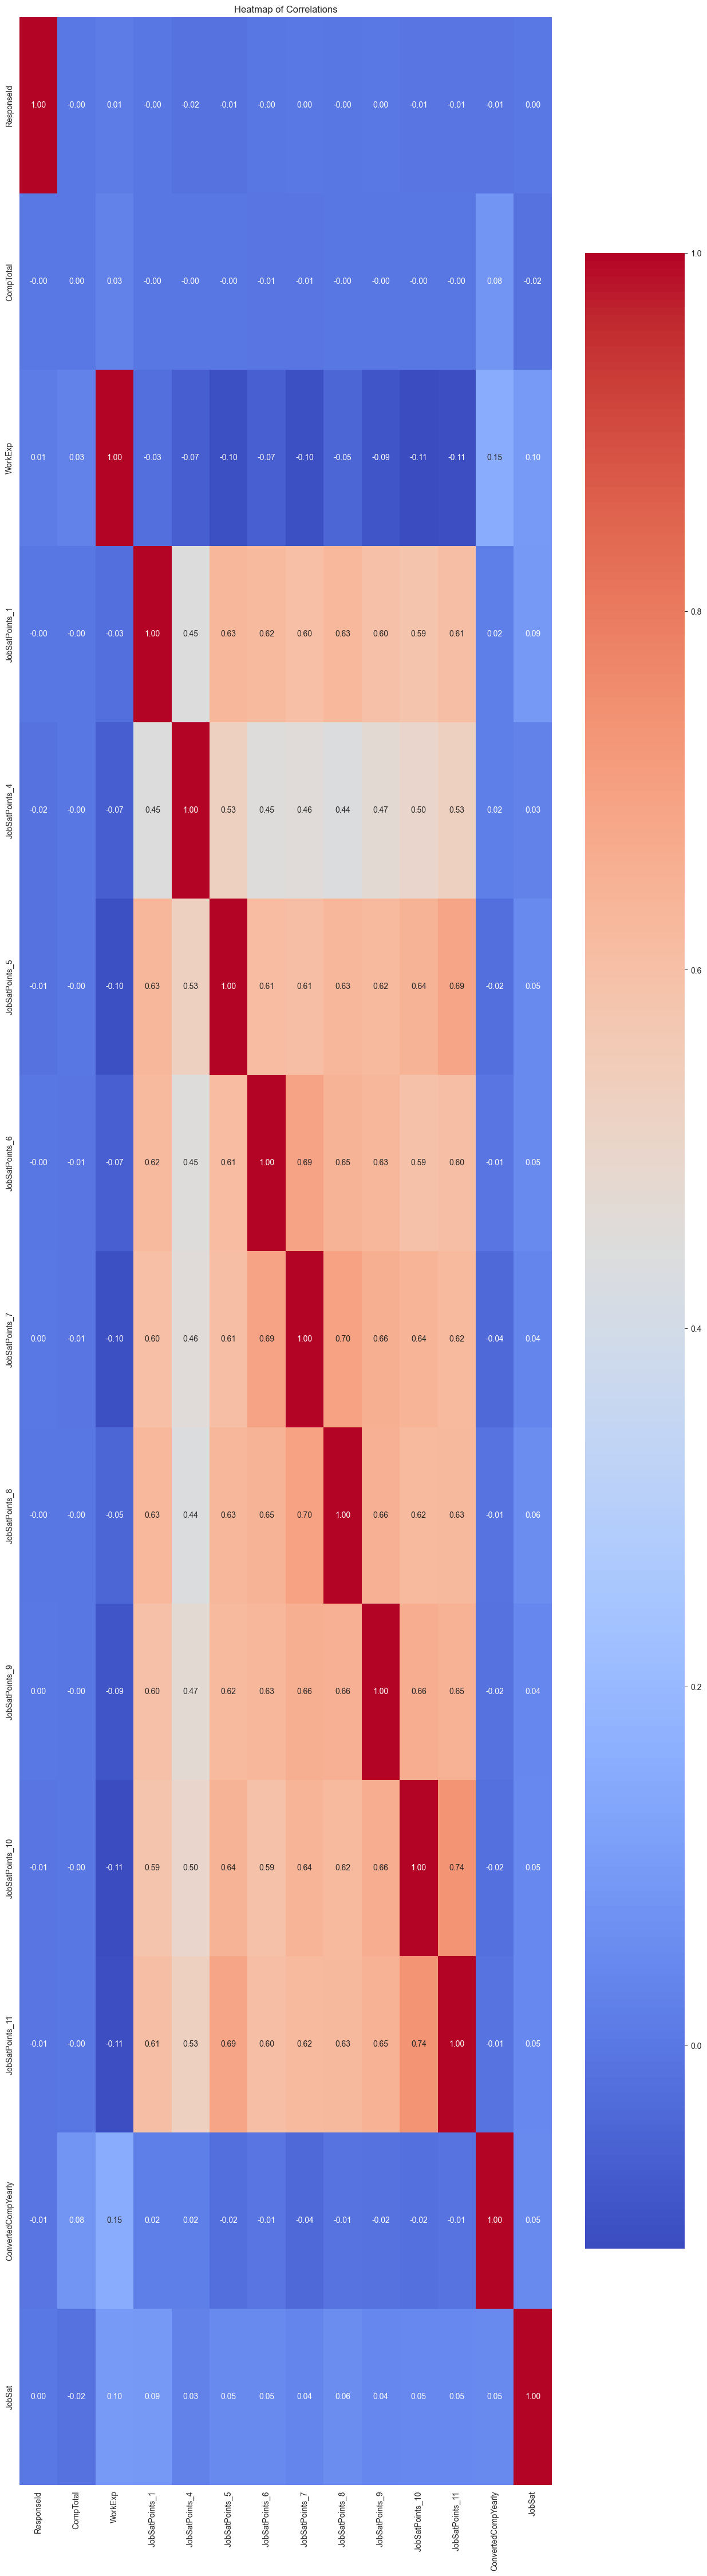

In [12]:
plt.figure(figsize=(15, len(numerical_cols)*4))

sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()

Heatmap with dropping NAN values

There was an error with the data before as we saw the Comptotal have zero coleration with itself this problem solved when we dropped the null values

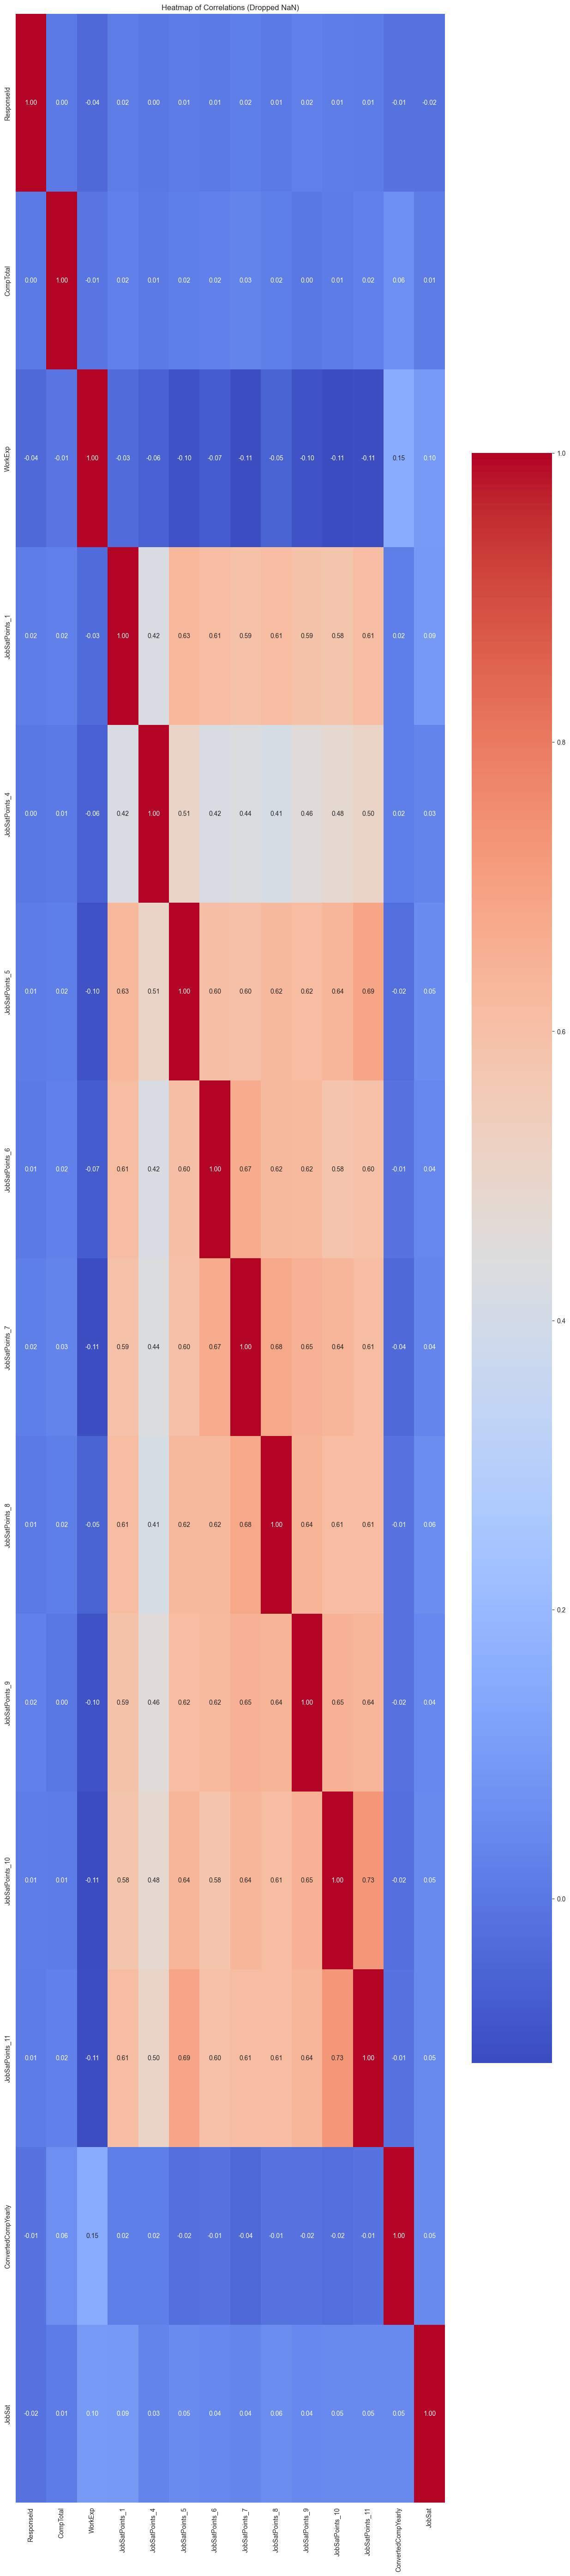

In [13]:
plt.figure(figsize=(15,len(numerical_cols)*5))
sns.heatmap(df[numerical_cols].dropna().corr(), annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Heatmap of Correlations (Dropped NaN)')
plt.show()

We suggest the company to search more for experienced workers, And there's as we see there's zero corelation between the Responseld with CompTotal Also zero corelation between JobSatPoints_4 with Responseld